In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [116]:
df = pd.read_csv("update_zuiderpark_arcs", index_col=0)
df.head()

,Side,arc,arc_left,arc_right,eNum,frameNum,pNum
0,l,10.957069,NaN,NaN,1,848.0,1
1,l,11.880671,NaN,NaN,1,849.0,1
2,l,14.815987,NaN,NaN,1,850.0,1
3,l,22.065236,NaN,NaN,1,851.0,1
4,l,28.623619,NaN,NaN,1,852.0,1


In [ ]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

In [117]:
pNumbers = df.pNum.unique()
#print(pNumbers)
#pNumbers = [1]

maxArcs = np.array([0, 0])

for pNum in pNumbers:
    pLeft = df[(df.pNum == pNum) & (df.Side == 'l') & (df.eNum == 1)]
    pRight = df[(df.pNum == pNum) & (df.Side == 'r') & (df.eNum == 1)]
    leftMax = pLeft.arc.max()
    rightMax = pRight.arc.max()   
    maxArcs = np.vstack((maxArcs, [leftMax, rightMax]))

maxArcs = np.delete(maxArcs, 0, 0)
#maxArcs
max(maxArcs[:,1])

202.48768211937005

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


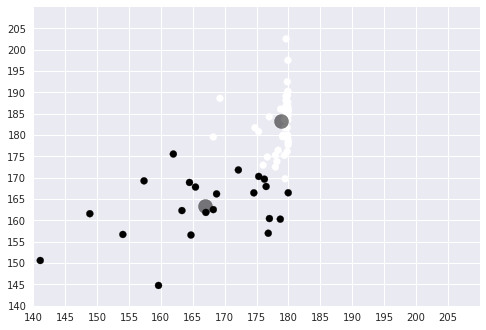

In [118]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(maxArcs)
y_kmeans = kmeans.predict(maxArcs)
plt.clf()
plt.yticks(np.arange(140, 210, 5))
plt.xticks(np.arange(140, 210, 5))
plt.ylim(140, 210)
plt.xlim(140, 210);
plt.xlabel("Hoeken linkerarm")
plt.Ylabel("Hoeken Rrarm")
plt.scatter(maxArcs[:,0], maxArcs[:,1], c=y_kmeans)


centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

In [ ]:
#df.Side.unique()
#X
p3 = df[(df.pNum == 3) & (df.Side == 'l')]
print(p3.iloc[0:100])

In [ ]:
df.head()